In [1]:
import pandas as pd
import datetime as dt
from prophet import Prophet
import numpy as np

data = pd.read_csv("../raw_data/stock_prices_latest.csv",parse_dates = True)

In [2]:
data['date'] = pd.to_datetime(data['date'])

In [3]:
dataMVA= data[(data.symbol=="JPM")]

dataMVA= dataMVA[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]
#dataMVA= dataMVA[(dataMVA.date.dt.year > 2015 ) & (dataMVA.date.dt.year < 2021)]

dataMVA.sort_values(by=["date"], inplace=True)
dataMVA = dataMVA.assign(MVA10 = "",MVA20 = "")

dataMVA

<ipython-input-3-f9daf0a242d9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataMVA= dataMVA[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]


,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,MVA10,MVA20
12068053,JPM,2017-01-03,87.34,87.7600,85.9800,87.23,84.8665,20550714,1.0,,
12067260,JPM,2017-01-04,86.96,87.1800,86.4000,86.91,85.0222,15265665,1.0,,
12066088,JPM,2017-01-05,86.81,87.1100,85.2589,86.11,84.2396,14300638,1.0,,
12067396,JPM,2017-01-06,86.39,86.6200,85.9400,86.12,84.2494,12893298,1.0,,
12069250,JPM,2017-01-09,85.73,86.7700,85.5200,86.18,84.3081,12795648,1.0,,
...,...,...,...,...,...,...,...,...,...,...,...
18746383,JPM,2018-12-24,92.89,94.2200,92.1400,92.14,91.3871,17009280,1.0,,
18746505,JPM,2018-12-26,92.69,95.9600,91.1100,95.96,95.1759,22542900,1.0,,
18746510,JPM,2018-12-27,94.82,97.1500,93.5500,97.04,96.2471,20304683,1.0,,
18746623,JPM,2018-12-28,97.95,98.3200,96.4400,96.83,96.0388,17963271,1.0,,


In [4]:
dataMVA['MVA20'] = dataMVA.iloc[:,6].rolling(window=20).mean()
dataMVA['MVA10'] = dataMVA.iloc[:,6].rolling(window=10).mean()
dataMVA

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,MVA10,MVA20
12068053,JPM,2017-01-03,87.34,87.7600,85.9800,87.23,84.8665,20550714,1.0,NaN,NaN
12067260,JPM,2017-01-04,86.96,87.1800,86.4000,86.91,85.0222,15265665,1.0,NaN,NaN
12066088,JPM,2017-01-05,86.81,87.1100,85.2589,86.11,84.2396,14300638,1.0,NaN,NaN
12067396,JPM,2017-01-06,86.39,86.6200,85.9400,86.12,84.2494,12893298,1.0,NaN,NaN
12069250,JPM,2017-01-09,85.73,86.7700,85.5200,86.18,84.3081,12795648,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18746383,JPM,2018-12-24,92.89,94.2200,92.1400,92.14,91.3871,17009280,1.0,97.23895,102.202050
18746505,JPM,2018-12-26,92.69,95.9600,91.1100,95.96,95.1759,22542900,1.0,96.80155,101.542480
18746510,JPM,2018-12-27,94.82,97.1500,93.5500,97.04,96.2471,20304683,1.0,96.40680,100.913660
18746623,JPM,2018-12-28,97.95,98.3200,96.4400,96.83,96.0388,17963271,1.0,95.98130,100.213925


In [5]:
dataMVA = dataMVA[["date", "MVA10"]].copy()  #à verifier, si il faut garder le .copy() ou pas
dataMVA.rename(columns={"date": "ds", "MVA10": "y"}, inplace=True)
dataMVA

,ds,y
12068053,2017-01-03,NaN
12067260,2017-01-04,NaN
12066088,2017-01-05,NaN
12067396,2017-01-06,NaN
12069250,2017-01-09,NaN
...,...,...
18746383,2018-12-24,97.23895
18746505,2018-12-26,96.80155
18746510,2018-12-27,96.40680
18746623,2018-12-28,95.98130


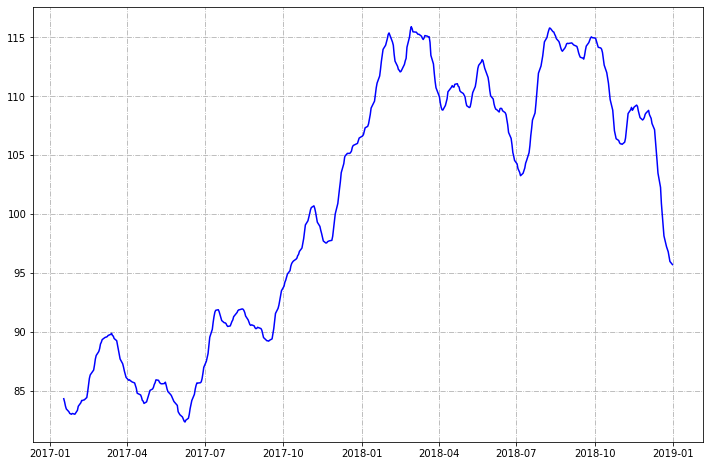

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(dataMVA['ds'], dataMVA['y'], 'b')
plt.show()

In [8]:
index=round(len(dataMVA)*80/100)
index

402

In [10]:
train = dataMVA.iloc[:index]
test = dataMVA.iloc[index:]

In [11]:
train.shape, test.shape

((402, 2), (100, 2))

In [12]:
train

,ds,y
12068053,2017-01-03,NaN
12067260,2017-01-04,NaN
12066088,2017-01-05,NaN
12067396,2017-01-06,NaN
12069250,2017-01-09,NaN
...,...,...
18034619,2018-08-01,113.41983
18034691,2018-08-02,114.04151
18034648,2018-08-03,114.61851
18034705,2018-08-06,114.99292


In [13]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
horizon = 36
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
433,2021-04-01,92.104883,-720.777869,793.028755
434,2021-05-01,-138.056803,-1251.641034,1140.531550
435,2021-06-01,91.105843,-793.684413,861.378128
436,2021-07-01,90.587435,-826.449734,892.392394
437,2021-08-01,-135.744734,-1375.726844,1287.682724


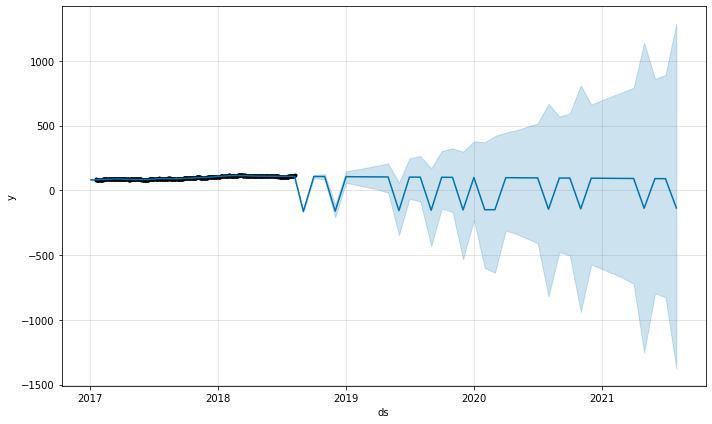

In [15]:
ax = model.plot(forecast);

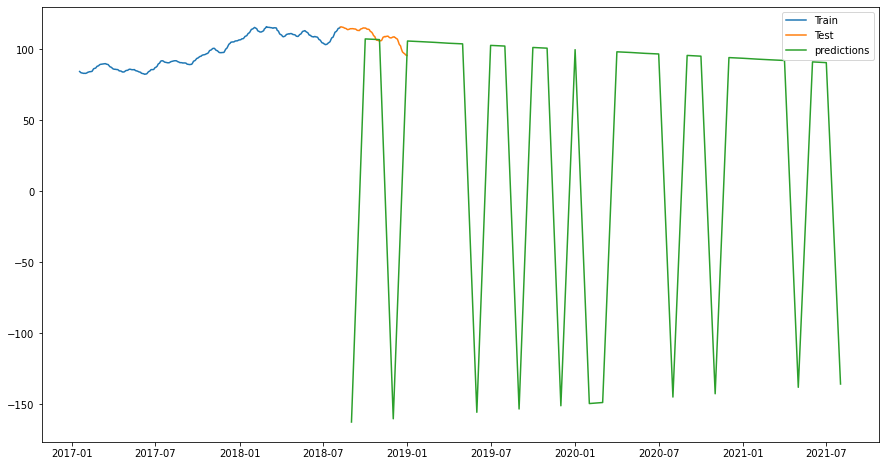

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

In [17]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
# Your code here
cv_results = cross_validation(model=model, initial=f'{20 * 5} days', horizon='35 days', period='180 days')

# Comment choisir le chiffre initial {XX*5} et horizon 'XX days' (ici initial=20 et horizon=75)

INFO:prophet:Making 3 forecasts with cutoffs between 2017-07-08 00:00:00 and 2018-07-03 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [18]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-07-10,88.659648,87.935036,89.315132,90.22453,2017-07-08
1,2017-07-11,88.900646,88.194502,89.645478,90.82375,2017-07-08
2,2017-07-12,89.076497,88.202921,89.928808,91.31163,2017-07-08
3,2017-07-13,89.286799,88.307064,90.275260,91.68372,2017-07-08
4,2017-07-14,89.517095,88.284490,90.576053,91.84087,2017-07-08
...,...,...,...,...,...,...
68,2018-08-01,105.426567,99.021199,112.050718,113.41983,2018-07-03
69,2018-08-02,105.394364,98.919155,112.597033,114.04151,2018-07-03
70,2018-08-03,105.359305,98.659502,113.013775,114.61851,2018-07-03
71,2018-08-06,105.057070,97.299033,114.004533,114.99292,2018-07-03


In [19]:
dataMVA_p = performance_metrics(cv_results)
dataMVA_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,5.469348,2.338664,2.077787,0.021103,0.021174,0.021040,0.285714
1,5 days,5.232842,2.287541,2.045135,0.021059,0.024478,0.021072,0.285714
2,6 days,4.079124,2.019684,1.812046,0.018617,0.024478,0.018702,0.428571
3,7 days,4.710008,2.170255,1.968008,0.019670,0.025302,0.019660,0.428571
4,8 days,5.254729,2.292320,2.142583,0.020841,0.025302,0.020746,0.428571
5,9 days,4.964794,2.228182,2.128236,0.020787,0.021415,0.020701,0.333333
6,10 days,4.401399,2.097951,2.039080,0.020098,0.021415,0.020035,0.500000
7,11 days,3.870293,1.967306,1.908026,0.019079,0.019568,0.019052,0.571429
8,12 days,2.951457,1.717980,1.640663,0.016621,0.017005,0.016648,0.714286
9,13 days,2.045932,1.430361,1.269725,0.012422,0.012447,0.012476,1.000000


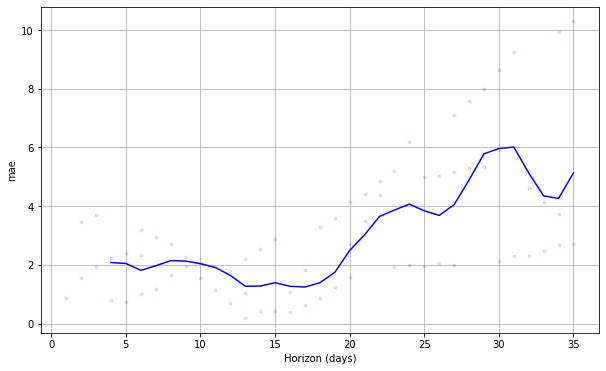

In [20]:
# Plot results below
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mae');